In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
!ls data/

_97bd1c1e5df9537bb13398c9898deed7_detroit-blight-violations.csv
buildings.csv
_dcebfb2135a2bf5a6392493bd61aba22_detroit-311.csv
_dcebfb2135a2bf5a6392493bd61aba22_detroit-crime.csv
_dcebfb2135a2bf5a6392493bd61aba22_detroit-demolition-permits.tsv


In [6]:
demolition_data = pd.read_csv("data/_dcebfb2135a2bf5a6392493bd61aba22_detroit-demolition-permits.tsv", sep='\t')
demolition_data.head()

,PERMIT_NO,PERMIT_APPLIED,PERMIT_ISSUED,PERMIT_EXPIRES,SITE_ADDRESS,BETWEEN1,PARCEL_NO,LOT_NUMBER,SUBDIVISION,CASE_TYPE,...,CONTRACTOR_ADDRESS1,CONTRACTOR_ADDRESS2,CONTRACTOR_CITY,CONTRACTOR_STATE,CONTRACTOR_ZIP,CONDITION_FOR_APPROVAL,site_location,owner_location,contractor_location,geom
0,BLD2015-03955,8/28/15,8/28/15,NaN,4331 BARHAM,BETWEEN VOIGHT AND WAVENEY,21 65525-6,S15,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
1,BLD2015-04083,8/28/15,8/28/15,NaN,9707 BESSEMORE,BETWEEN VINTON AND GRATIOT,19 2312.,40,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"9707 BESSEMORE\nDetroit, MI\n(42.395122, -83.0...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
2,BLD2015-03976,8/28/15,8/28/15,NaN,5315 BERKSHIRE,BETWEEN SOUTHAMPTON AND FRANKFORT,21 69321.,445,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"5315 BERKSHIRE\nDetroit, MI\n(42.40322, -82.94...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
3,BLD2015-03781,8/28/15,8/28/15,NaN,16670 BRINGARD DR,BETWEEN CUSHING AND SHAKESPEARE,21 25930.,97,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"16670 BRINGARD DR\nDetroit, MI\n(42.44664, -82...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
4,BLD2015-03677,8/28/15,8/28/15,NaN,1454 BEATRICE,BETWEEN TORONTO AND GILROY,20 12871.012,21,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"1454 BEATRICE\nDetroit, MI\n(42.276956, -83.14...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN


In [7]:
demolition_data.shape

(7133, 55)

In [8]:
incident_data = pd.read_csv("data/_97bd1c1e5df9537bb13398c9898deed7_detroit-blight-violations.csv")
incident_data.head()

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (6,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TicketID,TicketNumber,AgencyName,ViolName,ViolationStreetNumber,ViolationStreetName,MailingStreetNumber,MailingStreetName,MailingCity,MailingState,...,AdminFee,LateFee,StateFee,CleanUpCost,JudgmentAmt,PaymentStatus,Void,ViolationCategory,ViolationAddress,MailingAddress
0,26288,05000001DAH,Department of Public Works,"Group, LLC, Grand Holding",2566,GRAND BLVD,743,"Beaubien, Ste. 201",Detroit,MI,...,$20.00,$150.00,$10.00,$0.00,$1680.00,PAID IN FULL,0.0,0,"2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...","743 Beaubien\nDetroit, MI 48226\n(42.333730630..."
1,19800,05000025DAH,Department of Public Works,"JACKSON, RAECHELLE",19014,ASHTON,20501,HEYDEN,DETROIT,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"19014 ASHTON\nDetroit, MI\n(42.429390762000025...","20501 HEYDEN\nDETROIT, MI 48219\n(42.442177633..."
2,19804,05000026DAH,Department of Public Works,"TALTON, CAROL ANN",18735,STAHELIN,18735,STAHELI N,DETROIT,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"18735 STAHELIN\nDetroit, MI\n(42.4287074590000...","18735 STAHELI N\nDETROIT, MI 48219\n(42.428707..."
3,20208,05000027DAH,Department of Public Works,"BONNER, DARRYL E.",20125,MONICA,25335,PEEKSKILL,SOUTHFIELD,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"20125 MONICA\nDetroit, MI\n(42.44169828400004,...","25335 PEEKSKILL\nSOUTHFIELD, MI 48043\n(42.475..."
4,20211,05000028DAH,Department of Public Works,"GREGORY, JAMES LEE",17397,PRAIRIE,17397,PRAIRIE,DETROIT,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"17397 PRAIRIE\nDetroit, MI\n(42.42031769500005...","17397 PRAIRIE\nDETROIT, MI 48221\n(42.42031769..."


In [9]:
incident_data.shape

(307804, 31)

In [11]:
call_data = pd.read_csv("data/_dcebfb2135a2bf5a6392493bd61aba22_detroit-311.csv")
call_data.shape

(19680, 15)

In [13]:
call_data.sample(20)

,ticket_id,city,issue_type,ticket_status,issue_description,rating,ticket_closed_date_time,acknowledged_at,ticket_created_date_time,ticket_last_updated_date_time,address,lat,lng,location,image
11751,1714093,City of Detroit,Potholes,Archived,Potholes located on Grixdale between Joseph Ca...,3,06/17/2015 01:27:46 PM,06/15/2015 02:31:41 PM,06/15/2015 02:27:58 PM,06/17/2015 01:27:46 PM,"Grixdale And Joseph Campau Detroit, Michigan",42.428303,-83.072773,"(42.4283027, -83.0727731)",NaN
13219,1791265,City of Detroit,Running Water in a Home or Building,Closed,NaN,2,07/22/2015 03:57:27 PM,07/21/2015 12:29:50 PM,07/21/2015 10:21:34 AM,07/22/2015 03:57:27 PM,"538 S Green Detroit, Michigan",42.297331,-83.109635,"(42.297331, -83.1096353)",NaN
5031,1473131,City of Detroit,Running Water in a Home or Building,Archived,PIPE BROKE,2,02/06/2015 08:35:12 AM,02/04/2015 08:47:47 AM,02/04/2015 08:33:57 AM,02/06/2015 08:35:12 AM,"5651 Casper Detroit, Michigan",42.335766,-83.142278,"(42.3357661, -83.1422779)",NaN
9288,1633980,City of Detroit,Tree Issue,Archived,NaN,2,05/06/2015 08:13:34 PM,NaN,05/06/2015 06:27:57 PM,05/06/2015 08:13:34 PM,"10902 Beaconsfield Street Detroit, MI 48224, USA",42.420004,-82.948451,"(42.420004, -82.948451)",NaN
17835,1926600,City of Detroit,Trash Issue - Bulk waste deposited more than 2...,Closed,OMBUDSMAN 15-105518; 6765 & 6781 METTETAL BETW...,2,09/30/2015 09:04:01 AM,09/22/2015 04:36:13 PM,09/22/2015 08:51:58 AM,09/30/2015 09:04:01 AM,"6765 Mettetal DETROIT, Michigan",42.340929,-83.204981,"(42.340929, -83.204981)",NaN
10192,1660653,City of Detroit,Potholes,Archived,NaN,2,05/22/2015 11:00:18 AM,05/20/2015 01:11:25 PM,05/20/2015 11:27:59 AM,05/22/2015 11:00:19 AM,"Between Outer Drive And 7 Mile Detroit, Michigan",42.446973,-83.103000,"(42.4469725, -83.103)",NaN
6642,1566502,City of Detroit,Potholes,Archived,potholes in alley,2,04/02/2015 07:17:40 AM,04/01/2015 04:21:10 PM,04/01/2015 04:13:18 PM,04/02/2015 07:17:41 AM,"16159 Parkside Detroit, Michigan",42.411010,-83.131566,"(42.4110103, -83.1315664)",NaN
8820,1621169,City of Detroit,Tree Issue,Archived,CITIZEN STATES THAT THE TREE IS DEAD AND NEEDS...,2,05/06/2015 08:37:24 AM,05/01/2015 08:05:14 AM,04/30/2015 09:46:25 AM,05/06/2015 08:37:24 AM,"13606 Ashton DETROIT, Michigan",42.385930,-83.218157,"(42.38593, -83.218157)",NaN
17662,1924375,City of Detroit,Illegal Dumping / Illegal Dump Sites,Closed,NaN,3,09/24/2015 02:21:55 PM,09/21/2015 04:29:26 PM,09/21/2015 11:28:40 AM,09/24/2015 02:21:56 PM,Alma And Kelly,42.421356,-82.963044,"(42.4213559, -82.963044)",https://crm.seeclickfix.com/files/issue_images...
16796,1900641,City of Detroit,Potholes,Closed,Huge sinkhole @ the end of my driveway and my ...,3,09/10/2015 01:51:51 PM,09/08/2015 02:47:49 PM,09/08/2015 01:05:43 PM,09/10/2015 01:51:51 PM,"14230/14240 Camden Detroit, Michigan",42.406234,-82.967804,"(42.406234, -82.967804)",https://seeclickfix.com/files/issue_images/003...


In [10]:
#cluster based on lat and lon
from sklearn.cluster import DBSCAN 
from geopy.distance import distance

In [32]:
distance((42.1234, -83.4321), (42.1234, -83.4322)).meters

8.269021479914125

### generate a list of buildings from blight violation & demolition data:
- cluster geo locations
- use the centroid of each cluster as the building location
- define a building as a rectangle of size xxx

In [84]:
from sklearn.metrics import euclidean_distances

In [89]:
euclidean_distances((42.1234, -83.4321), (42.1234, -83.4322))

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.0001]])

In [131]:
def get_distance(A, B):
    return distance((A[0], A[1]), (B[0], B[1])).meters

In [214]:
# model = DBSCAN(eps=80, metric=get_distance,) 
model = DBSCAN(eps=0.0002, min_samples=2, algorithm='kd_tree', leaf_size=100)

In [215]:
model.fit(inci_df[['lat', 'lon']])

DBSCAN(algorithm='kd_tree', eps=0.0002, leaf_size=100, metric='euclidean',
    min_samples=2, p=None, random_state=None)

In [128]:
get_distance([-83.15355317,  42.41751996],
       [-83.15363728,  42.41760868])

9.46721230905962

In [224]:
# check cluster size and contents
mask = (model.labels_ == 500)
inci_df[['lon','lat']].values[mask]

array([[-83.15888362,  42.41018107],
       [-83.15900807,  42.4112573 ],
       [-83.15901729,  42.41153731],
       [-83.1589977 ,  42.41096808],
       [-83.15895391,  42.41163064],
       [-83.15893317,  42.41125154],
       [-83.15893317,  42.41125154],
       [-83.15889399,  42.41029054],
       [-83.15889399,  42.41029054],
       [-83.15902766,  42.41163756],
       [-83.15901729,  42.41144743],
       [-83.15896774,  42.41048758],
       [-83.15893317,  42.41125154],
       [-83.15893317,  42.41125154],
       [-83.15889399,  42.41029054],
       [-83.15889399,  42.41029054],
       [-83.15889399,  42.41048067],
       [-83.15889399,  42.41048067],
       [-83.15897811,  42.41067771],
       [-83.15897811,  42.41067771],
       [-83.1589977 ,  42.41096808],
       [-83.1589977 ,  42.41105796],
       [-83.1589977 ,  42.41105796],
       [-83.15893317,  42.41135064],
       [-83.15893317,  42.41135064],
       [-83.15894354,  42.41144052],
       [-83.15894354,  42.41144052],
 

In [225]:
for i in inci_df[['lon','lat']].values[mask]:
    for j in inci_df[['lon','lat']].values[mask]:
        print get_distance(i, j)

0.0
19.9538520709
23.4175791676
16.4902310178
20.8213007394
15.2786558181
15.2786558181
1.86068083084
1.86068083084
25.1834254124
22.5091898554
10.2407674813
15.2786558181
15.2786558181
1.86068083084
1.86068083084
4.15060989285
4.15060989285
12.4499576246
12.4499576246
16.4902310178
17.2741566442
17.2741566442
16.5144247499
16.5144247499
18.0422807892
18.0422807892
15.2786558181
15.2786558181
6.87268263862
6.87268263862
9.52064439012
5.7517531395
26.2234463264
10.2407674813
12.4499576246
12.4499576246
12.4499576246
12.4499576246
26.2234463264
16.5144247499
11.3135027672
9.77313904225
12.4499576246
12.4499576246
8.53224733722
8.53224733722
6.87268263862
12.4499576246
12.4499576246
12.4499576246
12.4499576246
20.8213007394
20.8213007394
14.0424162429
12.5481886943
20.8213007394
20.8213007394
19.9538520709
0.0
3.864764298
4.01825026675
7.82619372829
8.36480700901
8.36480700901
18.1031562681
18.1031562681
5.51153603566
2.73090260698
11.1869530438
8.36480700901
8.36480700901
18.1031562681
1

number of clusters: 11001


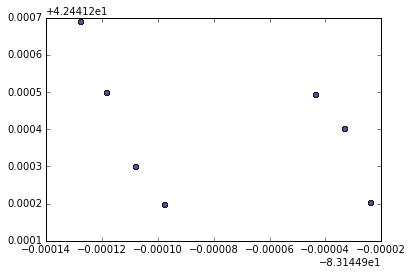

In [119]:
# X = inci_df[['lon','lat']].values
# labels = model.labels_
# unique_labels = set(labels)
# location_mask = ()
# print "number of clusters: %d" %len(unique_labels)
# colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = 'k'
#         continue
#     class_member_mask = (labels == k)

#     xy = X[class_member_mask ]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
#              markeredgecolor='k', markersize=5)

In [226]:
print sum(model.labels_ == -1), len(set(model.labels_))
print sum(model.labels_ == -1) + len(set(model.labels_)) - 1

9189 31081
40269


In [180]:
raw_buildings = pd.concat([inci_df[['lon','lat']], pd.DataFrame(model.labels_, columns=['label'])], axis=1)
clustered_buildings = raw_buildings[raw_buildings.label >= 0]
building_df = pd.concat([clustered_buildings.groupby('label').mean(), raw_buildings[raw_buildings.label == -1]], ignore_index=True)
building_df.drop('label', axis=1, inplace=True)
# building_df['No'] = range(building_df.shape[0])

In [181]:
building_df.head()

,lat,lon
0,42.363186,-83.091669
1,42.429329,-83.220389
2,42.428929,-83.227529
3,42.441671,-83.144992
4,42.418294,-83.153599


In [192]:
def get_buildings(lat, lon, r=20):
    """Given lat, lon, return building No. from building_df.
    Building is defined as a circle of radius 20m
    """
    dist = building_df.apply(lambda x: get_distance((x.lat, x.lon), (lat, lon)), axis=1)
    return dist[dist < r]

In [193]:
get_buildings(42.363186, -83.091669)

0    0.064213
dtype: float64

In [201]:
building_df.to_csv("./data/buildings.csv", index_label='No')

In [202]:
!head data/buildings.csv

No,lat,lon
0,42.3631855172,-83.0916685714
1,42.429329435,-83.2203889691
2,42.428928697,-83.2275286351
3,42.4416705907,-83.1449917133
4,42.418293712,-83.1535993829
5,42.4209649475,-83.1537419477
6,42.331681138,-83.047996037
7,42.427743921,-83.1445513112
8,42.3528973019,-83.2234853425
